In [1]:
from qiskit import QuantumCircuit, execute, transpile
from qiskit.circuit import Parameter
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
import numpy as np
from math import pi
import math
import qiskit.tools.jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [2]:
phi = Parameter('phi')

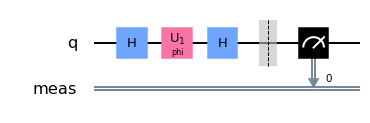

In [3]:
mz = QuantumCircuit(1)
mz.h(0)
mz.u1(phi, 0)
mz.h(0)
mz.measure_all()
mz.draw()

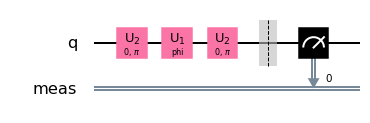

In [4]:
mz_transpiled = transpile(mz, basis_gates=['u1', 'u2', 'u3'])
mz_transpiled.draw()

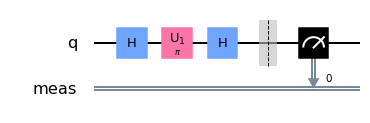

In [5]:
mz.assign_parameters({phi:pi}).draw()

In [6]:
n_max = 40
parameter_list = [{phi:pi*n} for n in np.linspace(0,4,40)]

In [7]:
shots=1024
job_ideal = execute(mz, parameter_binds=parameter_list, backend=QasmSimulator(), shots=shots)

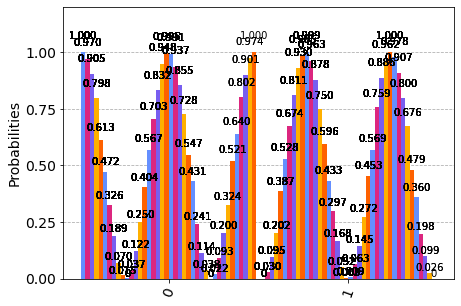

In [8]:
plot_histogram(job_ideal.result().get_counts())

In [9]:
from qiskit import IBMQ

In [10]:
IBMQ.load_account()

/Users/junye/opt/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
provider = IBMQ.get_provider('ibm-q-internal')
provider

<AccountProvider for IBMQ(hub='ibm-q-internal', group='deployed', project='default')>

In [12]:
ibmq_armonk = provider.get_backend('ibmq_armonk')
ibmq_yorktown = provider.get_backend('ibmq_5_yorktown') 
ibmq_melbourne = provider.get_backend('ibmq_16_melbourne')
ibmq_vigo = provider.get_backend('ibmq_vigo')

In [13]:
job_armonk = execute(mz, parameter_binds=parameter_list, backend=ibmq_armonk, shots=1024)

In [13]:
job_yorktown = execute(mz, parameter_binds=parameter_list, backend=ibmq_yorktown, shots=1024)

In [13]:
job_melbourne = execute(mz, parameter_binds=parameter_list, backend=ibmq_melbourne, shots=1024)

In [13]:
job_vigo = execute(mz, parameter_binds=parameter_list, backend=ibmq_vigo, shots=1024)

In [15]:
job_armonk = ibmq_armonk.retrieve_job('5f7421854d66ec0012f0fed0')
job_yorktown = ibmq_yorktown.retrieve_job('5f742836661aec0012537cf0')
job_melbourne = ibmq_melbourne.retrieve_job('5f74287c359f1b001341fdab')
job_vigo = ibmq_vigo.retrieve_job('5f7428a6359f1b001341fdad')

In [18]:
jobs = [job_armonk, job_yorktown, job_melbourne, job_vigo]

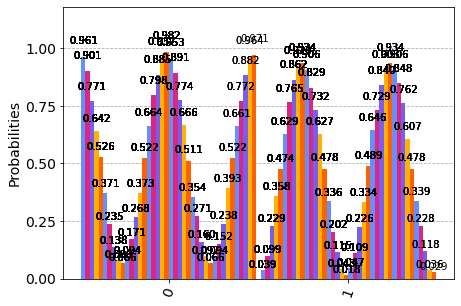

In [24]:
plot_histogram(jobs[0].result().get_counts())

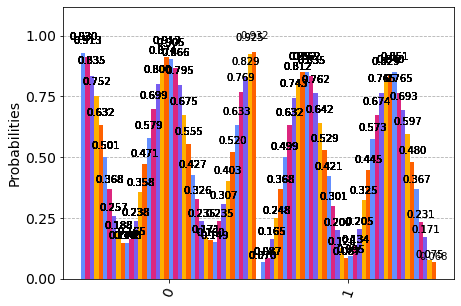

In [21]:
plot_histogram(jobs[1].result().get_counts())

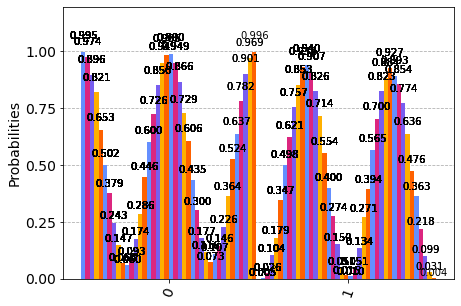

In [22]:
plot_histogram(jobs[2].result().get_counts())

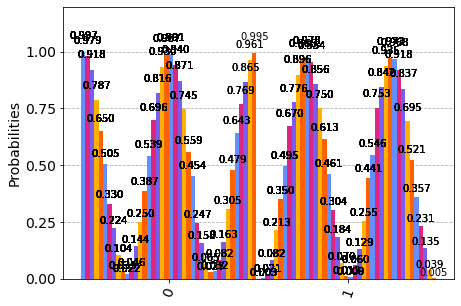

In [23]:
plot_histogram(jobs[3].result().get_counts())

In [21]:
counts = job.result().get_counts()

In [25]:
import matplotlib.pyplot as plt

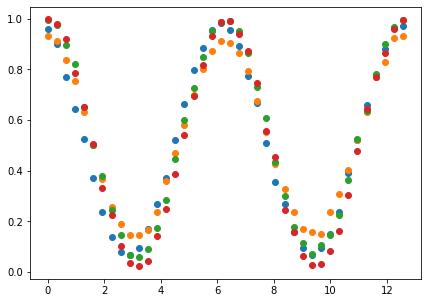

In [92]:
fig, ax = plt.subplots(figsize=(7, 5))
x = [pi*n for n in np.linspace(0,4,40)]
visibility = {}
for job in jobs:
    y = [d['0']/shots for d in job.result().get_counts()]
    vis = (max(y)-min(y))/(max(y)+min(y))
    visibility[job.backend().name()] = vis
    ax.scatter(x,y, label=f"{job.backend().name()}, Vis: {vis:.3f}")

In [93]:
ideal_x = np.linspace(0,4,100) * pi
ideal_y = 1/2 * (1 + np.cos(ideal_x))

In [103]:
ax.plot(ideal_x,ideal_y, 'y')

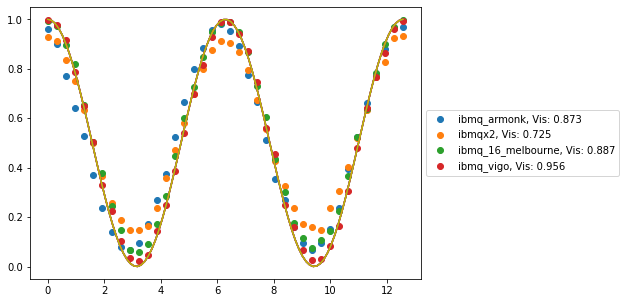

In [104]:
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig

In [105]:
fig.savefig('Mach_Zehnder.pdf', bbox_inches="tight")

In [107]:
fig.savefig('Mach_Zehnder.png', dpi=100, bbox_inches="tight")

Visibility

$$V=(p_{max}(0)-p_{min}(0))/(p_{max}(0)+p_{min}(0))$$

In [55]:
visibility = {}

In [58]:
for job in jobs:
    y = [d['0']/shots for d in job.result().get_counts()]
    visibility[job.backend().name()] = (max(y)-min(y))/(max(y)+min(y))

In [59]:
visibility

{'ibmq_armonk': 0.8733705772811918,
 'ibmqx2': 0.7251356238698011,
 'ibmq_16_melbourne': 0.8871415356151712,
 'ibmq_vigo': 0.9559386973180076}